# Introduction to Apache Spark Resilient Distributed Datasets (RDD)

### Initialization ###
Starting Spark session:

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/24 19:54:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
spark

In [3]:
sc = spark.sparkContext

### Reading text files

Download a file locally (just for the demo, for larger files use HDFS or S3):

In [4]:
import urllib.request

In [5]:
# urllib.request.urlretrieve("http://raw.githubusercontent.com/elastic/examples/master/Common%20Data%20Formats/apache_logs/apache_logs","apache_logs")

Create a first RDD

In [6]:
lines = sc.textFile("apache_logs")

Perform a *transformation*

In [7]:
lineLengths = lines.map(lambda s: len(s))

Perform an *action*

In [8]:
totalLength = lineLengths.reduce(lambda a, b: a + b)

Finally evaluate (laziness!)

In [9]:
totalLength

2360789

### Custom functions

In [10]:
def myFunc(s):
    words = s.split(" ")
    return len(words)

In [11]:
wordCounts = lines.map(myFunc)

In [12]:
wordCounts.max()

43

In [13]:
wordCounts.histogram([0,10,20,30,40,50])

22/10/24 19:54:18 ERROR Executor: Exception in task 0.0 in stage 2.0 (TID 4)
org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 668, in main
    func, profiler, deserializer, serializer = read_command(pickleSer, infile)
  File "/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 85, in read_command
    command = serializer._read_with_length(file)
  File "/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 173, in _read_with_length
    return self.loads(obj)
  File "/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 471, in loads
    return cloudpickle.loads(obj, encoding=encoding)


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 2.0 failed 1 times, most recent failure: Lost task 1.0 in stage 2.0 (TID 5) (192.168.0.241 executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 668, in main
    func, profiler, deserializer, serializer = read_command(pickleSer, infile)
  File "/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 85, in read_command
    command = serializer._read_with_length(file)
  File "/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 173, in _read_with_length
    return self.loads(obj)
  File "/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 471, in loads
    return cloudpickle.loads(obj, encoding=encoding)
AttributeError: 'ForwardRef' object has no attribute '__forward_is_class__'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:559)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:765)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:747)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:512)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1021)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2268)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2249)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2268)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2293)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1021)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1020)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:180)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 668, in main
    func, profiler, deserializer, serializer = read_command(pickleSer, infile)
  File "/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/worker.py", line 85, in read_command
    command = serializer._read_with_length(file)
  File "/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 173, in _read_with_length
    return self.loads(obj)
  File "/Users/mmastalerczyk/opt/anaconda3/envs/umap2/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/serializers.py", line 471, in loads
    return cloudpickle.loads(obj, encoding=encoding)
AttributeError: 'ForwardRef' object has no attribute '__forward_is_class__'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:559)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:765)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:747)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:512)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1021)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2268)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more


In [14]:
wordCounts.count()

10000

### Map-Reduce pattern

Let's look closer at our log file format:

```
99.158.0.150 - - [18/May/2015:04:05:37 +0000] "GET /images/jordan-80.png HTTP/1.1" 200 6146 "http://www.semicomplete.com/articles/dynamic-dns-with-dhcp/" "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/32.0.1700.102 Chrome/32.0.1700.102 Safari/537.36"
```

Count lines containing "Chrome":

In [21]:
chromeLines = lines.map(lambda s: (1 if "Chrome" in s else 0))

In [22]:
counts = chromeLines.reduce(lambda a, b: a + b)

In [23]:
counts

3172

### Key-Value Pairs

Count IP addresses

In [24]:
regex = '([(\d\.)]+)'

In [25]:
import re

In [26]:
ip = re.match(regex, '99.158.0.150 - - ').group(0)

In [27]:
print(ip)

99.158.0.150


In [28]:
ips = lines.map(lambda s: (re.match(regex, s).group(0) ,1))

In [29]:
ipCounts = ips.reduceByKey(lambda a, b: a + b)

Get results

In [30]:
ipCounts.collect()

[('83.149.9.216', 23),
 ('110.136.166.128', 6),
 ('46.105.14.53', 364),
 ('123.125.71.35', 1),
 ('200.49.190.100', 1),
 ('67.214.178.190', 2),
 ('207.241.237.220', 18),
 ('207.241.237.227', 17),
 ('207.241.237.228', 16),
 ('218.30.103.62', 16),
 ('71.212.224.97', 5),
 ('86.1.76.62', 6),
 ('107.170.41.69', 10),
 ('208.115.111.72', 83),
 ('174.37.205.76', 1),
 ('134.76.249.10', 8),
 ('123.125.71.117', 1),
 ('65.19.138.34', 3),
 ('5.102.173.71', 2),
 ('187.45.193.158', 8),
 ('36.38.8.174', 6),
 ('71.207.12.53', 2),
 ('220.241.45.142', 2),
 ('146.1.1.2', 15),
 ('178.255.215.83', 22),
 ('50.131.51.216', 17),
 ('212.197.170.45', 2),
 ('108.32.74.68', 14),
 ('180.76.5.27', 1),
 ('93.164.60.142', 1),
 ('108.178.4.100', 2),
 ('111.199.235.239', 37),
 ('108.171.116.194', 65),
 ('94.175.135.116', 1),
 ('207.241.237.104', 13),
 ('83.31.73.148', 2),
 ('180.76.6.156', 2),
 ('92.108.120.46', 2),
 ('172.56.29.98', 1),
 ('173.252.73.114', 1),
 ('217.69.133.70', 4),
 ('217.69.133.237', 4),
 ('209.17.114

In [31]:
ipCounts.take(20)

[('83.149.9.216', 23),
 ('110.136.166.128', 6),
 ('46.105.14.53', 364),
 ('123.125.71.35', 1),
 ('200.49.190.100', 1),
 ('67.214.178.190', 2),
 ('207.241.237.220', 18),
 ('207.241.237.227', 17),
 ('207.241.237.228', 16),
 ('218.30.103.62', 16),
 ('71.212.224.97', 5),
 ('86.1.76.62', 6),
 ('107.170.41.69', 10),
 ('208.115.111.72', 83),
 ('174.37.205.76', 1),
 ('134.76.249.10', 8),
 ('123.125.71.117', 1),
 ('65.19.138.34', 3),
 ('5.102.173.71', 2),
 ('187.45.193.158', 8)]

Sort by values (ascending):

In [32]:
ipCounts.takeOrdered(10, lambda pair: pair[1])

[('123.125.71.35', 1),
 ('200.49.190.100', 1),
 ('174.37.205.76', 1),
 ('123.125.71.117', 1),
 ('180.76.5.27', 1),
 ('93.164.60.142', 1),
 ('94.175.135.116', 1),
 ('172.56.29.98', 1),
 ('173.252.73.114', 1),
 ('54.226.176.99', 1)]

Sort by values (descending):

In [33]:
topIPs = ipCounts.takeOrdered(10, lambda pair: -pair[1])
topIPs

[('66.249.73.135', 482),
 ('46.105.14.53', 364),
 ('130.237.218.86', 357),
 ('75.97.9.59', 273),
 ('50.16.19.13', 113),
 ('209.85.238.199', 102),
 ('68.180.224.225', 99),
 ('100.43.83.137', 84),
 ('208.115.111.72', 83),
 ('198.46.149.143', 82)]

### Plotting

In [34]:
import pandas as pd

In [35]:
df = pd.DataFrame(topIPs, columns=['IP', 'Count'])
df

,IP,Count
0,66.249.73.135,482
1,46.105.14.53,364
2,130.237.218.86,357
3,75.97.9.59,273
4,50.16.19.13,113
5,209.85.238.199,102
6,68.180.224.225,99
7,100.43.83.137,84
8,208.115.111.72,83
9,198.46.149.143,82


In [36]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='IP'>

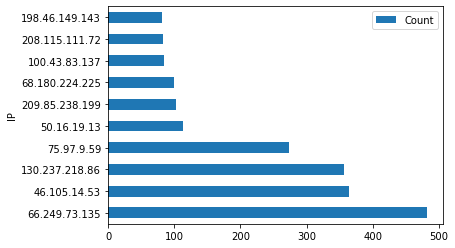

In [37]:
df.plot.barh(x = 'IP')

### Closures and accumulators

Local variables are not passed to closures or functions, they remain local!

In [38]:
counter = 0

# Wrong: Don't do this!!
def increment_counter(x):
    global counter
    counter += x

wordCounts.foreach(increment_counter)

print("Counter value: ", counter)

Counter value:  0


Use *accumulators* instead

In [39]:
accum = sc.accumulator(0)
accum

Accumulator<id=0, value=0>

In [40]:
# Correct way is to use accumulators
def increment_counter(x):
    accum.add(x)

wordCounts.foreach(increment_counter)

print("Counter value: ", accum)

Counter value:  197956


## Homework

### 1. Most popular web-browsers (pie chart)

In [41]:
filename = "apache_logs"
data = sc.textFile(filename)
data.collect()[:2]

['83.149.9.216 - - [17/May/2015:10:05:03 +0000] "GET /presentations/logstash-monitorama-2013/images/kibana-search.png HTTP/1.1" 200 203023 "http://semicomplete.com/presentations/logstash-monitorama-2013/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.77 Safari/537.36"',
 '83.149.9.216 - - [17/May/2015:10:05:43 +0000] "GET /presentations/logstash-monitorama-2013/images/kibana-dashboard3.png HTTP/1.1" 200 171717 "http://semicomplete.com/presentations/logstash-monitorama-2013/" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.77 Safari/537.36"']

In [42]:
import operator

webbrowser_regex = r"(chrome|opera|explorer|mozilla)"
webbrowsers_list = ["chrome", "mozilla", "opera", "explorer"]
top_k = 10

browsers_counts = (data
    .filter(lambda log: any(browser in log.lower() for browser in webbrowsers_list))
    .map(lambda log: (re.search(webbrowser_regex, log.lower()).group(0), 1))
    .filter(lambda x: x[0])
    .reduceByKey(operator.add)
    .takeOrdered(top_k, lambda x: -x[1])
)

browsers_counts

[('mozilla', 8400), ('opera', 93), ('chrome', 1)]

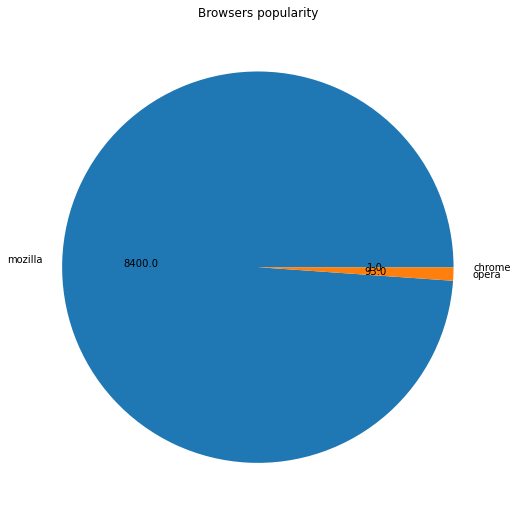

In [49]:
import numpy as np
xs = [browser for (browser, count) in browsers_counts]
ys = [count for (browser, count) in browsers_counts]
plt.figure(figsize=(16,9))
plt.pie(ys, labels=xs, autopct=lambda x: np.round(x/100.*np.array(ys).sum(), 0))
plt.title("Browsers popularity")

plt.show()

### 2. Requests count per hour grouped by return code (Bar plot)

In [52]:
from typing import Tuple

hour_regex = "\[\d+/\w+/\d+:(\d+):"
response_code_regex = "\"(GET|HEAD|POST|OPTIONS).*?\" (\d+)"

def get_hour_and_response_code(log: str) -> Tuple[int, int, int]:
    hour = int(re.search(hour_regex, log).group(1))
    response_code = int(re.search(response_code_regex, log).group(2))
    return (hour, response_code), 1

requests_counts = (data
    .map(lambda log: get_hour_and_response_code(log))
    .reduceByKey(operator.add)
    .map(lambda x: [x[0][0], x[0][1], x[1]])
    .collect()
)

<AxesSubplot:xlabel='hour', ylabel='count'>

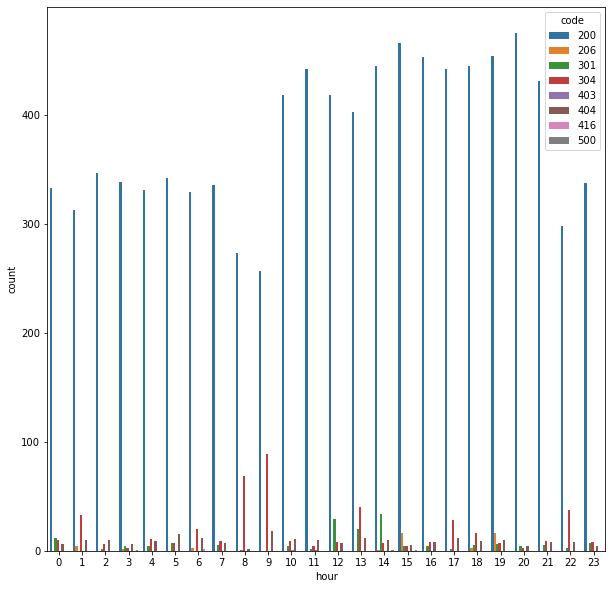

In [51]:
import seaborn as sns

df = pd.DataFrame(
    data=requests_counts,
    columns=["hour", "code", "count"]
)

plt.figure(figsize=[10, 10])
sns.barplot(data=df, x="hour", y="count", hue="code")

### 3. Most popular downloaded files by type


In [53]:
file_type_regex = "\"GET \S+\.([a-zA-Z]+) "
top_k = 10

def get_file_type(log: str) -> Tuple[str, int]:
    file_type = re.search(file_type_regex, log)
    return (file_type.group(1), 1) if file_type else ("", 0)


resource_type_counts = (data
    .filter(lambda log: "GET" in log)
    .map(lambda log: get_file_type(log))
    .reduceByKey(operator.add)
    .filter(lambda x: x[1] > 0)  # remove "empty" links count
    .takeOrdered(top_k, lambda x: -x[1])
)

resource_type_counts[:5]

[('png', 2331), ('css', 1458), ('ico', 800), ('html', 753), ('jpg', 257)]

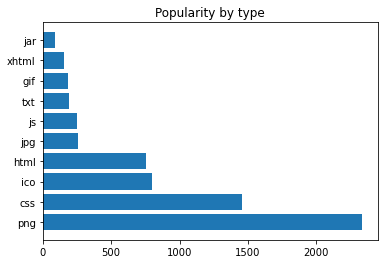

In [55]:
xs = [res_type for (res_type, count) in resource_type_counts]
ys = [count for (res_type, count) in resource_type_counts]

plt.barh(xs, ys)
plt.title("Popularity by type")
plt.show()

### 4. Users with geolocations

In [57]:
import cartopy.crs as crs
import ipinfo

ip_regex = "[(\d\.)]+"

ips = (data
    .map(lambda log: re.match(ip_regex, log).group(0))
    .distinct()
    .collect()
)

In [149]:
access_token = "525a864c405e04"
ipinfo_handler = ipinfo.getHandler(access_token=access_token)

ipinfo_response = ipinfo_handler.getBatchDetails(ips)
locations = [
    details["loc"].split(",")
    for details in ipinfo_response.values()
]

locations = [(float(lat), float(long)) for lat, long in locations]
lats =  [float(lat) for lat, long in locations]
longs = [float(long) for lat, long in locations]

locations[:5]

[(55.7522, 37.6156),
 (-6.9931, 110.4208),
 (39.9075, 116.3972),
 (14.5705, -90.4993),
 (40.7143, -74.006)]

<AxesSubplot: >

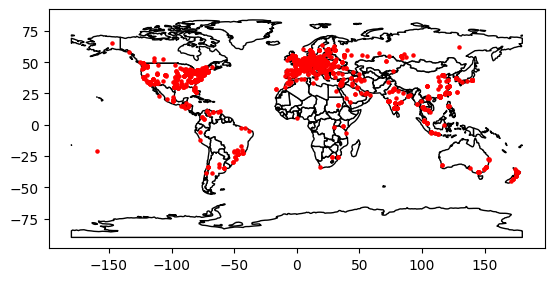

In [168]:
import geopandas as gpd
points = gpd.points_from_xy(longs, lats)
gdf = gpd.GeoDataFrame(points, geometry=points)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')

gdf.plot(ax=ax, color='red', markersize=5)

### Estimate percentage of traffic generated by bots

In [169]:
user_agent_regex = "\"(.*?)\""
bots_set = {"Googlebot", "AskJeeves", "Digger", "Lycos", "msnbot",
    "Inktomi Slurp", "Yahoo", "Nutch", "bingbot", "BingPreview",
    "Mediapartners-Google", "proximic", "AhrefsBot", "AdsBot-Google",
    "Ezooms", "AddThis.com", "facebookexternalhit", "MetaURI",
    "Feedfetcher-Google", "PaperLiBot", "TweetmemeBot", "Sogou web spider",
    "GoogleProducer", "RockmeltEmbedder", "ShareThisFetcher", "YandexBot",
    "rogerbot-crawler", "ShowyouBot", "Baiduspider", "Sosospider", "Exabot"
}

bot_count = (data
    .filter(lambda log: any(bot in log for bot in bots_set))
    .count()
)

bot_perc = 100 * (bot_count / data.count())
print(f"Estimated bot percentage: {bot_perc:.2f}%")

Estimated bot percentage: 13.47%
